In [1]:
from pandas import read_csv
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

OSError: [WinError 193] %1 n’est pas une application Win32 valide

In [22]:
train_full = read_csv('data/fashion-mnist_train.csv')
test_full = read_csv('data/fashion-mnist_test.csv')

In [23]:
train, val = train_test_split(train_full, test_size=0.2, random_state=42)

In [26]:
x_train = train.drop(['label'], axis="columns")
y_train = train['label']
x_val = val.drop(['label'], axis="columns")
y_val = val['label']

In [43]:
pca_dims = PCA()
pca_dims.fit(x_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

187

In [68]:
pca = PCA(n_components=d)
x_train_reduced = DataFrame(pca.fit_transform(x_train))

print("reduced shape: " + str(x_train_reduced.shape))


reduced shape: (48000, 187)


In [70]:
x_train_reduced[0]

0       -1781.765088
1       -1472.205380
2         -46.907963
3        -783.586409
4          87.375673
            ...     
47995    1977.270601
47996   -1481.135274
47997     362.818881
47998    1139.115821
47999    2110.625114
Name: 0, Length: 48000, dtype: float64

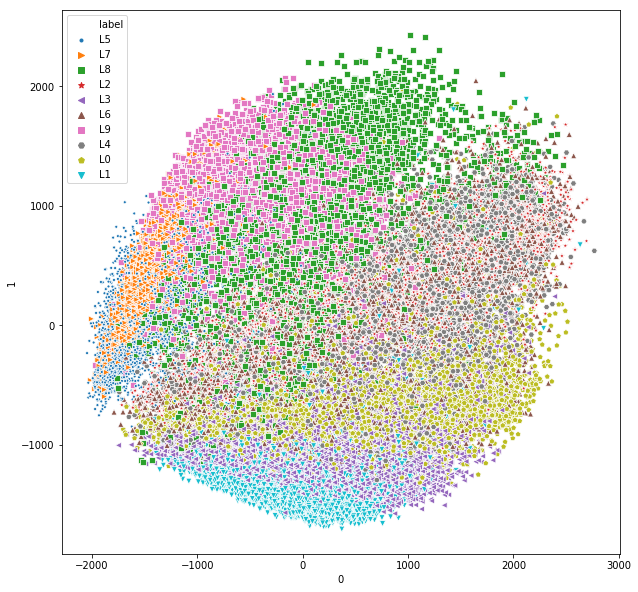

In [104]:
x_train_reduced['label'] = ["L"+str(y) for y in y_train]
markers = {"L0": "p","L5": ".","L6": "^","L4": "H","L1": "v","L2": "*","L3": "<","L9": "s","L7": ">","L8": ","}
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x=x_train_reduced[0], y=x_train_reduced[1], data=x_train_reduced, hue='label', style='label', markers=markers)

786887.9229973758
